## 投影片(https://docs.google.com/presentation/d/1Yw5BfhfQp0mxPvvXyJ2HC4Z80dkTg-pLXasLVdo8wGs/edit#slide=id.g21b66e086c_0_4)

## 什麼是Logistic Regression？
- Logistic Regression中文稱為邏輯回歸。  
- 要理解它，先讓我們來想一個簡單的問題。

## 如何畫出一條線，分開圈圈與叉叉
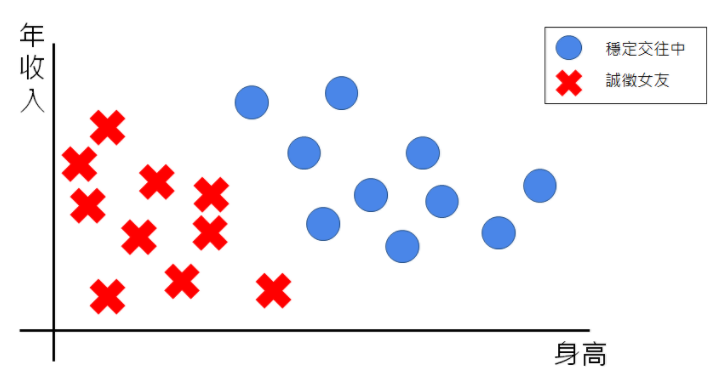

## 太簡單了，簡直在侮辱我的智商
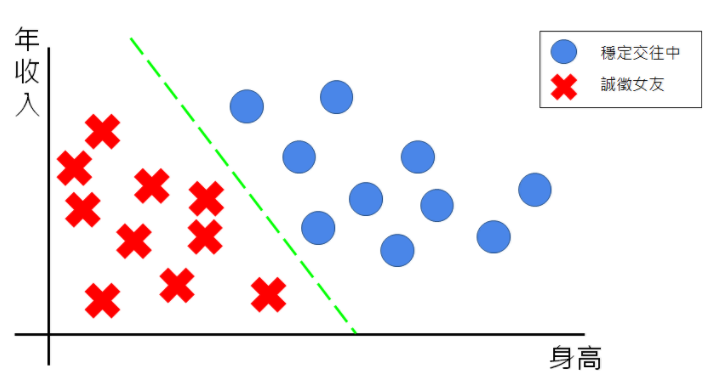

## 你會預測問號是圈圈還是叉叉？
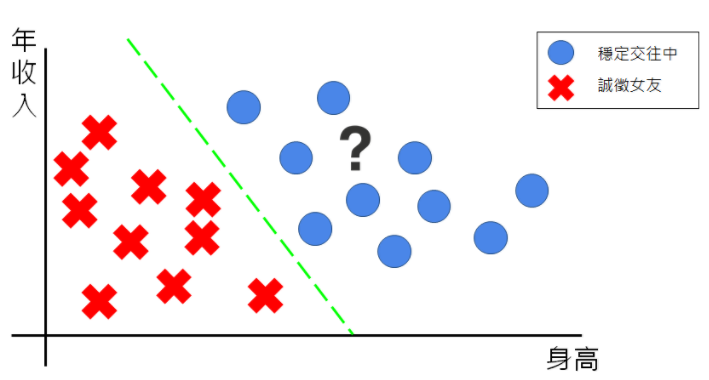

## 以過去的資料來看，會傾向預測它為圈圈
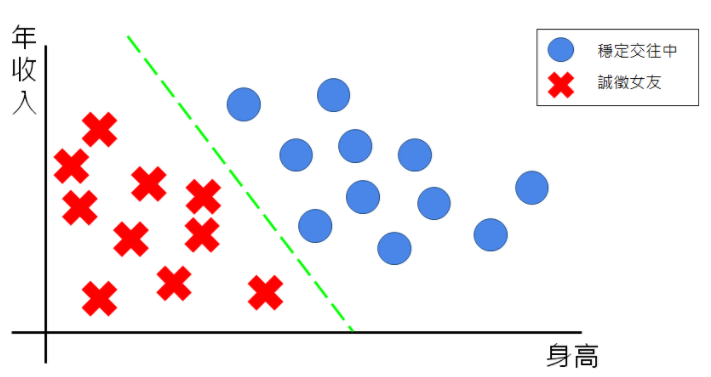

## 如何寫code，讓演算法自動去學習到這條分隔線呢？
* 請回憶一下各位國中時期數學課...  
  剛剛那條線的數學式，假設是 3 \* x1 + 2 * x2 - 6 = 0 好了。  
  那我們知道，線的右邊代入上式，出來的值都會大於0。反之都小於0。
  
  現在，那條線的數學式未知，  
  未知的數學式寫作 a \* x1 + b * x2 + c =0  
  我們希望圈圈代入那未知的式子會大於0，叉叉代入會小於0。

## Weights
因此我們的演算法找尋的是weights（權重），  
也就是未知數學式 a \* x1 + b * x2 + c =0  
當中的a、b、c啦！  

希望找到一組a、b、c，  
使得盡可能地讓所有圈圈代入式子會輸出大於0的值，反之叉叉代入小於0。  


## Weights 視覺化
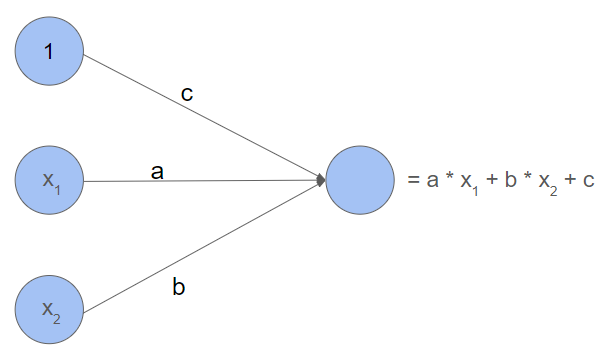

## Cost(Loss) Function
那我們寫code，可以用懲罰的概念來找尋那條線。  
演算法找出了一條線，但圈圈代入出來的值居然小於0。  
於是我們知道演算法出錯了，要給它懲罰、讓它付出代價。  

於是我們定義出一個Cost Function，  
明確地顯示現在演算法找出的那條線，到底出了多少錯，  
也就是它的花費（Cost）是多少。  

人們也喜歡稱之為Loss Function、Objective Function... 等等。

## Cost(Loss) Function: Cross Entropy
其中的  
yi 代表圈圈或叉叉，那在code裡我們可能用1代表圈圈、0代表叉叉。  
xi 代表資料點的座標（此刻我們還不知道資料點是圈圈還是叉叉）。  
h𝛳 代表未知的數學式，也就是那條線。  
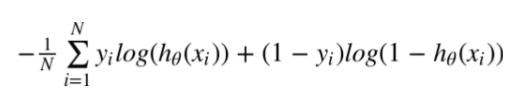

## 將圈圈與叉叉換為1跟0
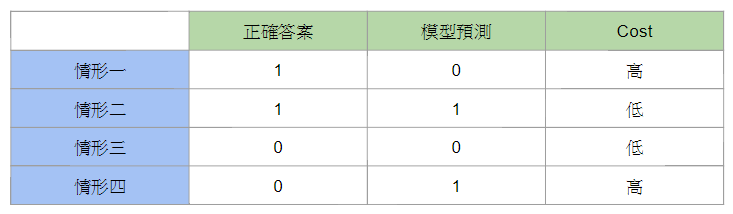

## 神奇的Activation Function！
Activation Function有很多種，  
我們先來使用最有名的Sigmoid Function！

## Activation Function - Sigmoid
Sigmoid Function：它能將任意實數映射至[0, 1]區間內。  
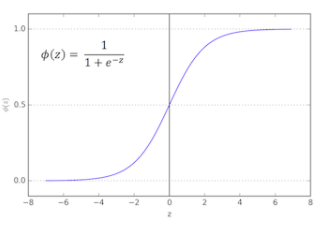
由上圖可看出，輸入的值大於0，會輸出大於0.5的值。

那我們只要將大於0.5的值分類為1（也就是圈圈），  
小於0.5的值分類為0（也就是叉叉）即可！

打個比喻就像投票一樣，只是每個人票數不一樣，權重高的人，票數比較多！  
只要最後票數超過一半（大於0.5），就是當選或決定某件事（分類為1）  
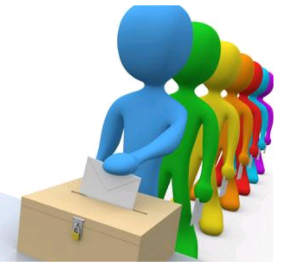

## 視覺化，最後套上Sigmoid的“那條線”
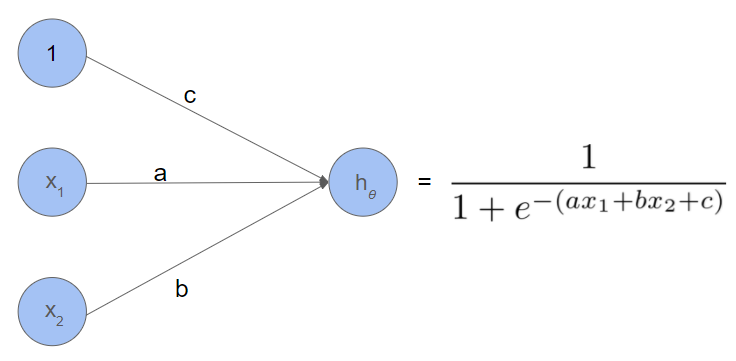

## 最小(佳)化Cost Function
經過以上的說明，得知只需最小化Cost，就能找出那條線。  
那要如何最小化Cost呢？假設Cost Function畫圖出來如下：
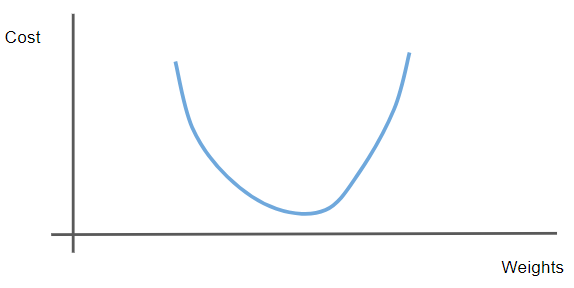

## Stochastic Gradient Descent(梯度下降法)
最常使用最小(佳)化Cost Function的演算法是SGD。  
令weights w=(a, b, c)，cost function為J(w)。
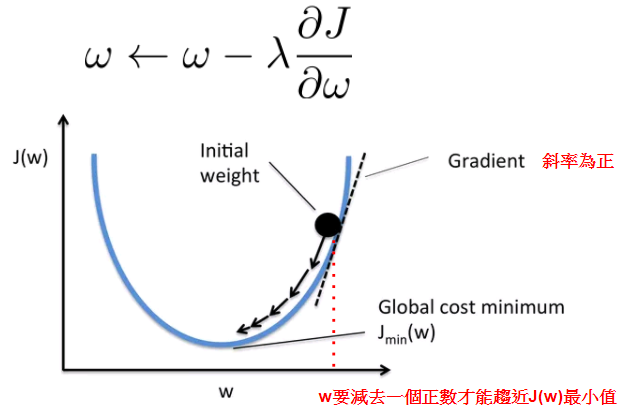

## 終於!! 終於!! 要談到 Keras 了
* 使用 Keras 實作上述的 network  
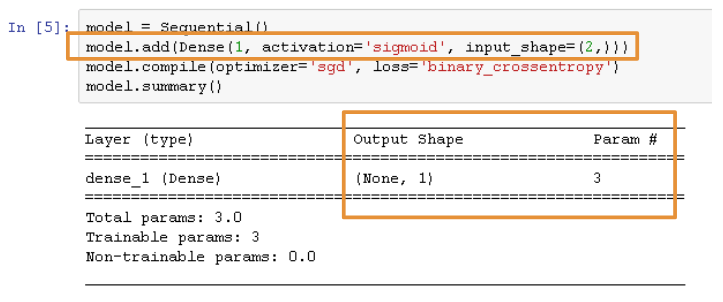

## 好像缺了什麼???
* 那 machine learning 的訓練和預測哩?
* 以下用實際的數據和程式驗證看看

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## 製作2維資料
* 也就是有沒有女朋友的兩組 data sets
* data: 年收入和身高
* label: 有沒有女朋友

In [13]:
data, label = make_blobs(n_samples=500, centers=2, random_state=1)
print("data:%r" % (data[:10]))
print("label:%r" % (label[:10]))

data:array([[-10.14090825,  -2.92036477],
       [ -2.51101556,   5.40737129],
       [-10.80389072,  -3.90428685],
       [  0.53113982,   2.51012895],
       [ -8.92872653,  -4.16310148],
       [  0.2450988 ,   5.51754657],
       [ -1.04157437,   4.22231354],
       [-10.13706431,  -4.68188604],
       [ -1.34928762,   2.31224205],
       [ -9.57179233,  -3.90426815]])
label:array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1])


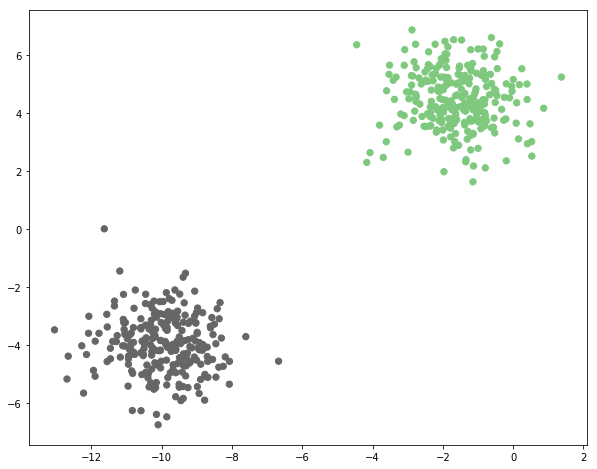

In [14]:
# draw picture
plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Accent)

## 使用Keras撰寫logistic regression

In [15]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## (training)疊代一次

In [16]:
model.fit(data, label, epochs=1, verbose=0)

## 測試看看準確度

In [17]:
result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0
result[:20]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [18]:
def accuary(label, result):
    cnt = 0;
    for i in range(0, len(label)):
        if (float(label[i]) == result[i][0]):
            cnt += 1;
        else:
            pass;
            #print("i:%d label[i]=%r result[i][0]:%r" % (i, label[i], result[i][0]))
    #print("equal cnt=%d" % (cnt))
    return (float(cnt) / label.shape[0]);

#print('Accuary:', float(sum(label == result)[0])  / label.shape[0])
print("Accuary:%f" % (accuary(label, result)))

Accuary:0.984000


## 畫出預測邊界

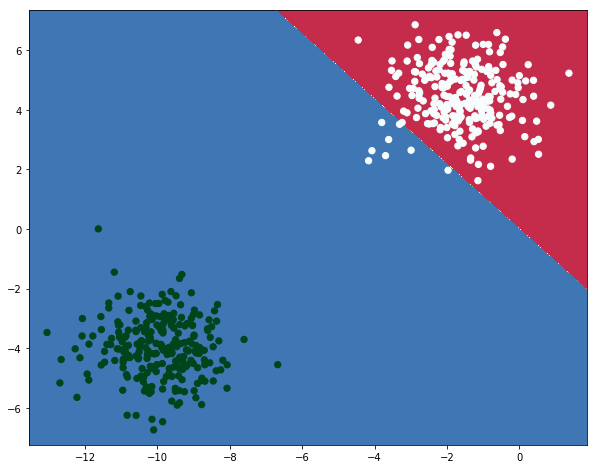

In [19]:
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    pred_every_point = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(pred_every_point)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)
    
plot_decision_boundary(data, label, model)

## 重新訓練 1000 次看看結果如何

In [20]:
%%time
model.fit(data, label, epochs=1000, verbose=0)

CPU times: user 17.4 s, sys: 7.04 s, total: 24.4 s
Wall time: 20.4 s


## CPU total time: process 花費時間
## Wall time: 實際呼叫花費時間(包含其他 processes 占用時間)

Accuary:1.000000
weights:array([[-0.5041834],
       [-2.2397902]], dtype=float32)
bias:array([-0.3418668], dtype=float32)


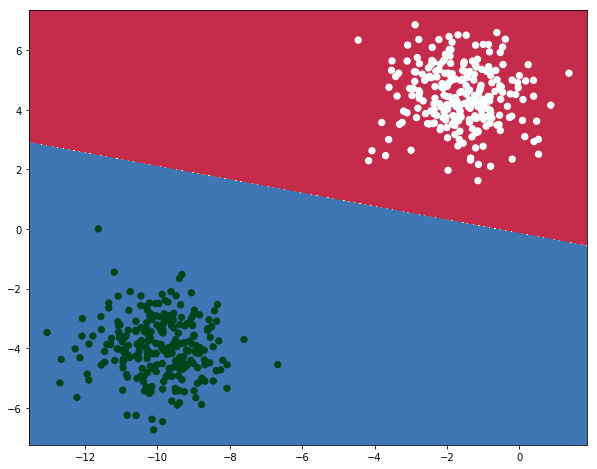

In [21]:
result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0
w, b = model.layers[0].get_weights()

#print('Accuary:', float(sum(label == result)[0])  / label.shape[0])
print("Accuary:%f" % (accuary(label, result)))
print("weights:%r" % (w))
print("bias:%r" % (b))
plot_decision_boundary(data, label, model)